In [1]:
import math
import heapq

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from time import time, sleep
from PIL import Image, ImageDraw, ImageOps
from IPython.display import display
from IPython.display import Image as Img
from heapq import heappop, heappush

In [2]:
def draw_dynamic(solution, map_filename, output_filename = 'animated_trajectories'):
    m = 30
    quality = 6
    
    k = len(solution)
    max_len = 0
    for s in solution:
        max_len = max(max_len, len(s))
    
    cells = []
    height, width = 0, 0
    with open(map_filename, "r") as map_file:
        for i, line in enumerate(map_file):
            if i == 0:
                width, height = tuple(map(int, line.split()))
            else:
                cells.append(list(line.strip().split()))

    h_im = height * m
    w_im = width * m
    
    step = 0
    images = []
    agent_colors = [(np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for _ in range(k)]
              
    while step < max_len:
        for n in range(0, quality):
            im = Image.new('RGB', (w_im, h_im), color = 'white')
            draw = ImageDraw.Draw(im)
            
            # draw static obstacles
            for i in range(height):
                for j in range(width):
                    if(cells[i][j] != '.'):
                        draw.rectangle((j * m, i * m, (j + 1) * m - 1, (i + 1) * m - 1), fill=( 70, 80, 80 ))
                
            #draw agents
            for i, path in enumerate(solution):
                pathlen = len(path)
                curr_node = path[min(pathlen - 1, step)]
                next_node = path[min(pathlen - 1, step + min(n, 1))]

                di = n * (next_node[0] - curr_node[0]) / quality
                dj = n * (next_node[1] - curr_node[1]) / quality

                draw.ellipse((float(curr_node[1] + dj + 0.2) * m, 
                            float(curr_node[0] + di + 0.2) * m, 
                            float(curr_node[1] + dj + 0.8) * m - 1, 
                            float(curr_node[0] + di + 0.8) * m - 1), 
                            fill=agent_colors[i], width=0)
            
            im = ImageOps.expand(im, border=2, fill='black')
            images.append(im)
        step += 1
    images[0].save('./'+output_filename+'.png', save_all=True, append_images=images[1:], optimize=False, duration=500/quality, loop=0)
    display(Img(filename = './'+output_filename+'.png'))

In [7]:
solution = []
with open("../results/res1.txt", "r") as res:
    for line in res:
        path = reversed(list(line.split())[2:])
        solution.append(np.array([int(p.strip("(), ")) for p in path]).reshape(-1, 2).tolist())

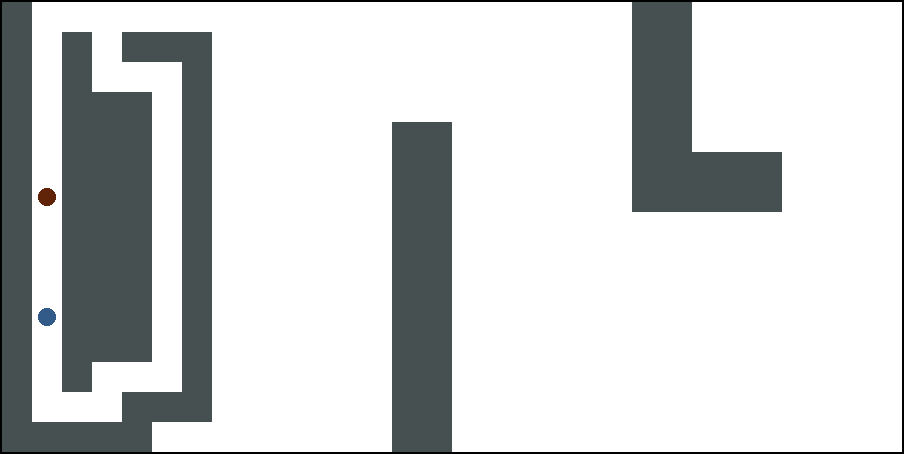

In [8]:
draw_dynamic(solution, "../samples/map1.txt")